In [11]:
# Victor Z and Leo Gonzalez
# UW-Madison, 2024
# regularization for Hougen-Watson equation

import numpy as np
from matplotlib import pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
# define model
def myf(b, x):
    b1, b2, b3, b4, b5 = b

    x1 = x[0]
    x2 = x[1]
    x3 = x[2]

    y = (b1*x2-x3/b5)/(1+b2*x1+b3*x2+b4*x3)

    return y

In [14]:
# load data
path = '/content/drive/MyDrive/StatsBookCode/Python/'
filename=path+'/Data/hougenwatson.dat'

data = np.loadtxt(filename);
X = data[:, :3]                                 # partial pressures
y = data[:, -1]                                 # reaction rate
n, m = X.shape

# best guess for parameters
beta = np.array([[1.0000e+00],
                 [5.0000e-02],
                 [2.0000e-02],
                 [1.0000e-01],
                 [2.0000e+00]])

# prior variance
sigma = 1

# span parameter
nmesh = 1000
bv = np.linspace(-2, 2, nmesh)
betav = beta.copy()

yhat = np.zeros(n)
e = np.zeros(n)
SSE = np.zeros(nmesh)

In [15]:
# evaluate function
for j in range(nmesh):
    betav[1] = bv[j]
    for i in range(n):
        yhat[i] = myf(betav, X[i])[0]
        e[i] = 0.5*(y[i]-yhat[i])**2+(0.5/sigma)*np.linalg.norm(betav-beta, ord = 2)**2
    SSE[j] = np.sum(e)

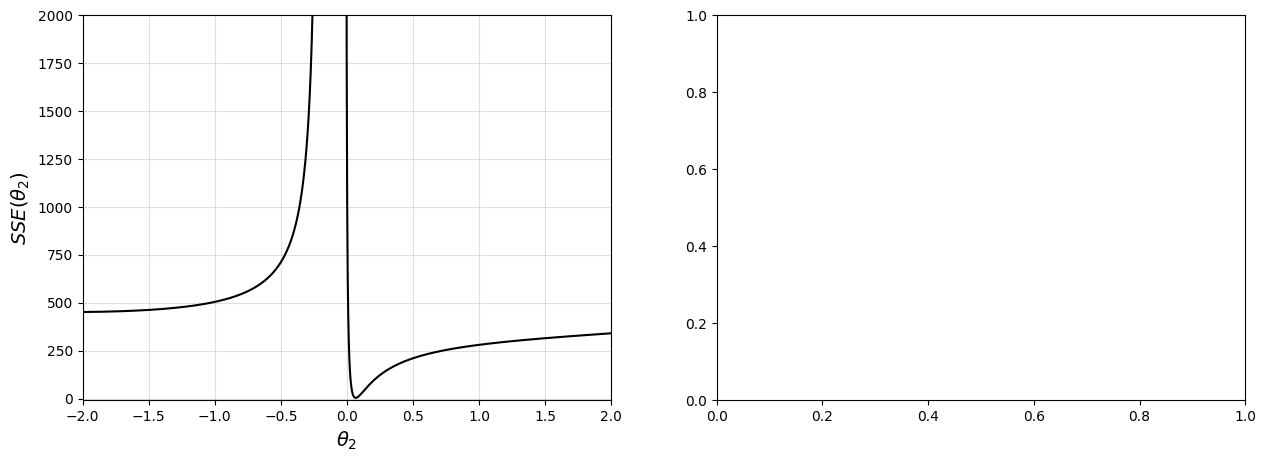

In [16]:
# plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 5])
ax1.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax1.set_axisbelow(True)
ax1.set_xlabel(r'$\theta_2$', fontsize = 14)
ax1.set_xlim(-2, 2)
ax1.set_ylabel(r'$SSE(\theta_2)$', fontsize = 14)
ax1.set_ylim(-10, 2000)
ax1.plot(bv, SSE, 'k-', linewidth = 1.5)

In [17]:
# span another param
bv = np.linspace(-50, 50, nmesh)

# evaluate function
for j in range(nmesh):
    betav[0] = bv[j]
    for i in range(n):
        yhat[i] = myf(betav, X[i])[0]
        e[i] = 0.5*(y[i]-yhat[i])**2+(0.5/sigma)*np.linalg.norm(betav-beta, ord = 2)**2
    SSE[j] = np.sum(e)

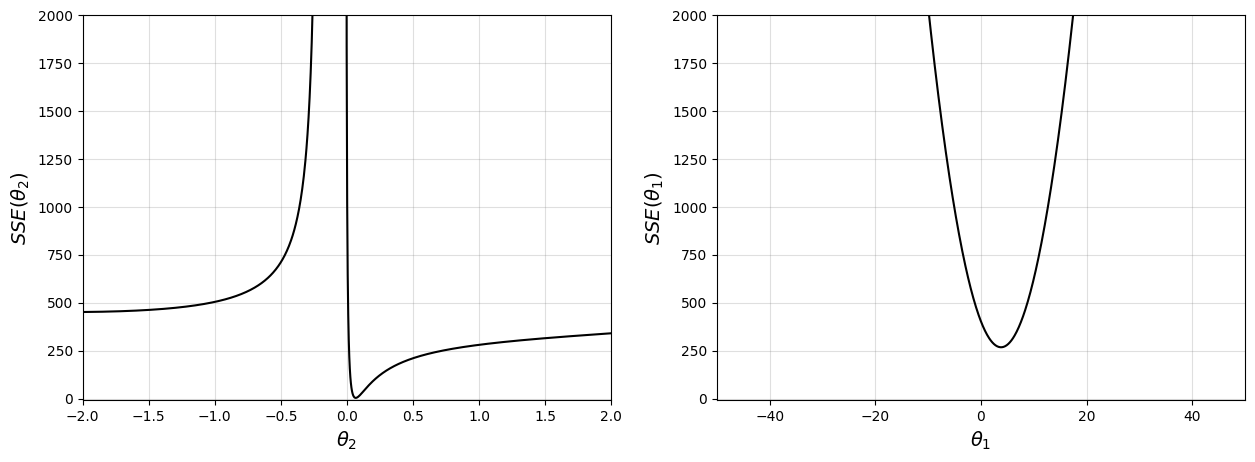

In [18]:
# plot results
ax2.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax2.set_axisbelow(True)
ax2.set_xlabel(r'$\theta_1$', fontsize = 14)
ax2.set_xlim(-50, 50)
ax2.set_ylabel(r'$SSE(\theta_1)$', fontsize = 14)
ax2.set_ylim(-10, 2000)
ax2.plot(bv, SSE, 'k-', linewidth = 1.5)
fig